In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.layers import SimpleRNN
#from keras.layers import GRU
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

df = pd.read_csv('UCI_data.csv')
df = df.sort_values(by='date')
df['date'] = pd.to_datetime(df['date'])
date = df['date'].reset_index(drop=True)
df = df.set_index('date').resample(rule='30T').ffill().interpolate(method='time').reset_index()
df

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
0,2016-01-11 17:00:00,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.00,45.566667,17.166667,...,45.530000,6.60,733.50,92.0,7.0,63.0,5.30,13.275433,13.275433,90
1,2016-01-11 17:30:00,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.89,45.723333,17.166667,...,45.400000,6.25,733.80,92.0,6.0,51.5,5.00,45.410389,45.410389,90
2,2016-01-11 18:00:00,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.89,45.790000,17.100000,...,45.290000,5.90,734.10,92.0,5.0,40.0,4.70,47.233763,47.233763,110
3,2016-01-11 18:30:00,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.89,46.096667,17.100000,...,45.290000,5.95,734.30,91.5,5.5,40.0,4.65,3.089314,3.089314,110
4,2016-01-11 19:00:00,20.133333,48.000000,19.566667,44.400000,19.890000,44.900000,19.00,46.363333,17.100000,...,45.290000,6.00,734.50,91.0,6.0,40.0,4.60,34.351142,34.351142,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,2016-05-27 16:00:00,25.500000,45.730000,26.000000,41.428571,28.100000,40.433333,24.70,45.433333,23.100000,...,46.590000,22.80,755.50,55.0,2.0,23.0,13.20,18.215602,18.215602,100
6575,2016-05-27 16:30:00,25.426667,46.060000,26.000000,41.700000,28.000000,40.760000,24.70,45.400000,23.200000,...,46.700000,22.90,755.35,55.0,2.5,22.5,13.30,23.009520,23.009520,220
6576,2016-05-27 17:00:00,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.70,45.626667,23.200000,...,46.751429,23.00,755.20,55.0,3.0,22.0,13.40,18.248201,18.248201,110
6577,2016-05-27 17:30:00,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.70,45.590000,23.230000,...,46.790000,22.60,755.20,56.0,3.5,24.5,13.30,49.282940,49.282940,90


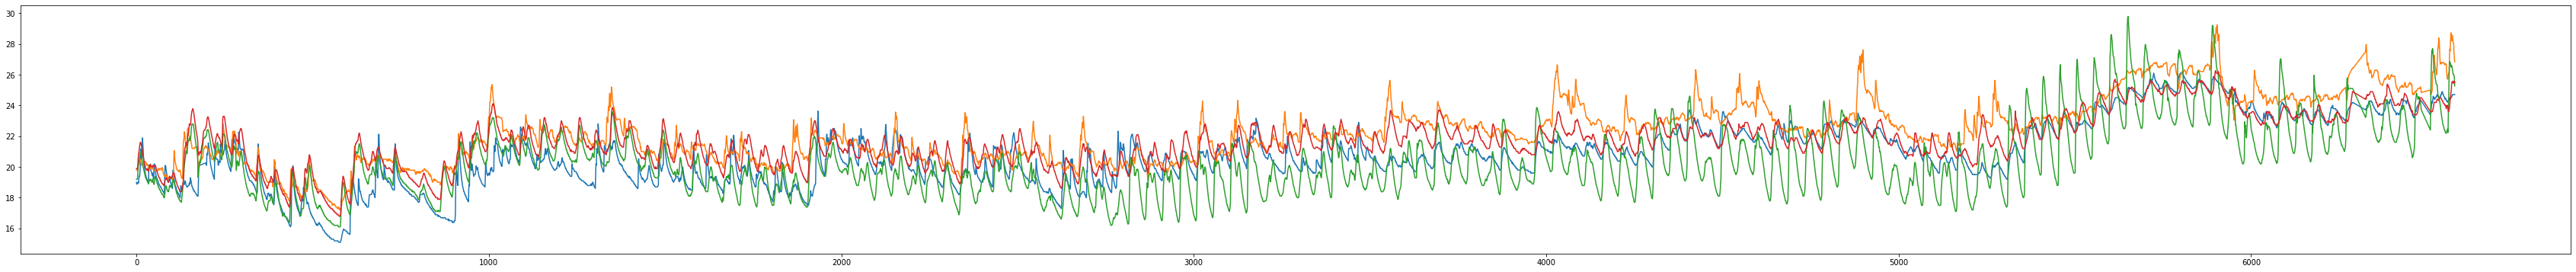

In [24]:
plt.figure(figsize=(60,6))
plt.plot(df['T4'])
plt.plot(df['T3'])
plt.plot(df['T2'])
plt.plot(df['T1'])

In [4]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

X,y = df_to_X_y(df['T4'])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, shuffle=False)
X_train.shape[-1]

1

In [57]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(4, 1)))
model.add(LSTM(int(50/2), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

#define the learning rate
optimizer = Adam(learning_rate=5e-3)

#compile model
model.compile(optimizer=optimizer, loss='mae')

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [58]:
cp1 = ModelCheckpoint('model2/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [59]:
callback = EarlyStopping(monitor='loss', patience=3)
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, callbacks=[cp1, callback])

Epoch 1/150
174/190 [==========================>...] - ETA: 0s - loss: 0.0385 - root_mean_squared_error: 0.1961

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


190/190 [==============================] - 2s 6ms/step - loss: 0.0385 - root_mean_squared_error: 0.1961 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0753
Epoch 2/150
190/190 [==============================] - 0s 2ms/step - loss: 0.0384 - root_mean_squared_error: 0.1959 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0846
Epoch 3/150
190/190 [==============================] - 0s 2ms/step - loss: 0.0386 - root_mean_squared_error: 0.1965 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0908
Epoch 4/150
190/190 [==============================] - 0s 2ms/step - loss: 0.0381 - root_mean_squared_error: 0.1952 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0776
Epoch 5/150
190/190 [==============================] - 0s 2ms/step - loss: 0.0382 - root_mean_squared_error: 0.1955 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0821
Epoch 6/150
175/190 [==========================>...] - ETA: 0s - loss: 0.0382 - root_mean_squared_error: 0.1953

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


190/190 [==============================] - 1s 6ms/step - loss: 0.0378 - root_mean_squared_error: 0.1943 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0744
Epoch 7/150
190/190 [==============================] - 0s 2ms/step - loss: 0.0379 - root_mean_squared_error: 0.1946 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0762
Epoch 8/150
190/190 [==============================] - 0s 2ms/step - loss: 0.0381 - root_mean_squared_error: 0.1951 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0924
Epoch 9/150
190/190 [==============================] - 0s 2ms/step - loss: 0.0385 - root_mean_squared_error: 0.1961 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0860


16/16 [==============================] - 0s 2ms/step


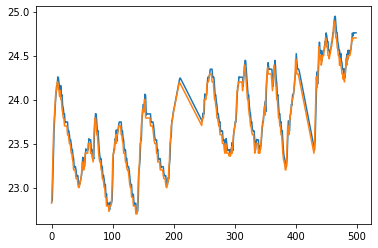

In [77]:
pred = model1.predict(X_test)
pred.shape
y_test = y_test.reshape(-1,1)

plt.plot(pred)
plt.plot(y_test)

In [19]:

some_other_data = pd.read_csv('MLTempDataset.csv')

some_other_data_temp = some_other_data['DAYTON_MW']
X,y = df_to_X_y(some_other_data_temp, window_size=5)
model1 = tf.keras.models.load_model('./model1')
pred2 = model1.predict(X[-5:-1])
y.reshape(-1,1)

[[[28.533]
  [28.983]
  [29.367]
  [28.767]
  [28.   ]]

 [[28.983]
  [29.367]
  [28.767]
  [28.   ]
  [27.35 ]]

 [[29.367]
  [28.767]
  [28.   ]
  [27.35 ]
  [26.8  ]]

 [[28.767]
  [28.   ]
  [27.35 ]
  [26.8  ]
  [26.45 ]]]
1/1 [==============================] - 0s 250ms/step
6671
4


array([[20.1  ],
       [19.8  ],
       [19.5  ],
       ...,
       [26.45 ],
       [25.9  ],
       [25.567]])

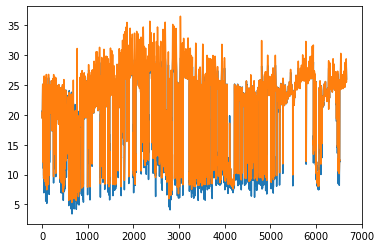

In [89]:
plt.plot(pred2)
plt.plot(y)

In [12]:

some_other_data2 = pd.read_csv('train.csv')

some_other_data_temp2 = some_other_data2['Indoor_temperature_room']
X2,y2 = df_to_X_y(some_other_data_temp)

print(X2.shape)
pred2 = model1.predict(X2)

y2.reshape(-1,1)

(6672, 4, 1)


ValueError: in user code:

    File "C:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "C:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 5, 1), found shape=(None, 4, 1)


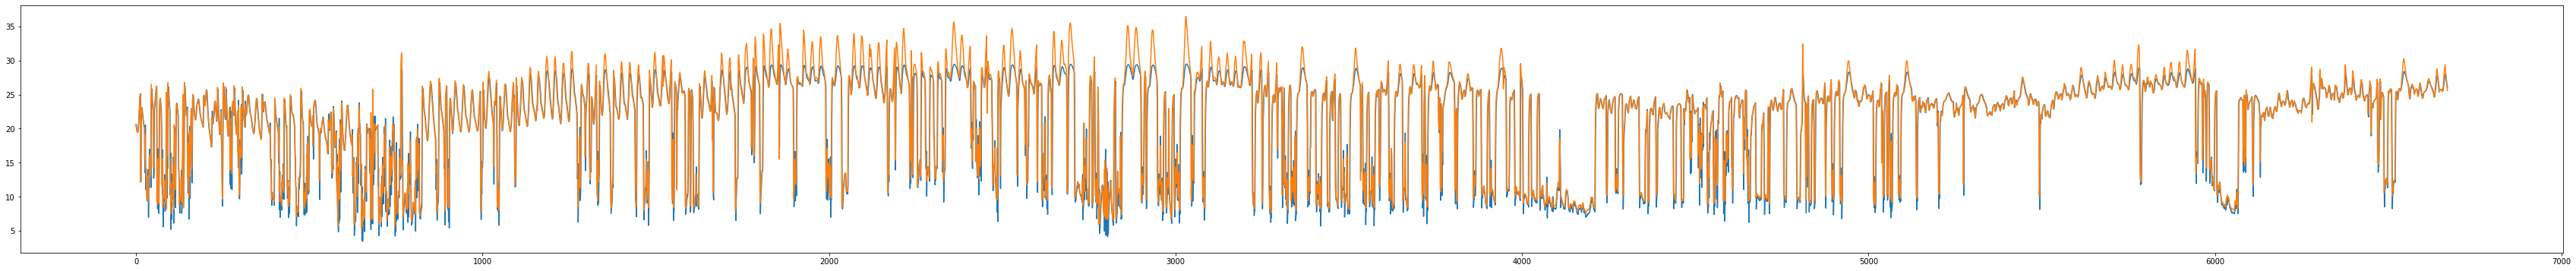

In [93]:
plt.figure(figsize=(60,6))
plt.plot(pred2)
plt.plot(y)

In [109]:
ok = X2[0:500]
ok2 = X2[0:750]
lags = 4 
# for i in range(len(ok),len(ok2)):
#     X_test=ok2[i-lags:i]
#     val=model1.predict(X_test)
#     ok2[i]=val
    
# final_test = ok2[len(ok):]
len(final_test)


250

In [110]:
ok[1]

array([[21.   ],
       [20.867],
       [20.65 ],
       [20.4  ]])

In [121]:
X[1:2]
# some_other_predicition = model1.predict(X[1:2])

array([[[21.   ],
        [20.867],
        [20.65 ],
        [20.4  ]]])

In [119]:
some_other_predicition  

array([[20.345589]], dtype=float32)